# Grid Search p89

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [3]:
cancer = load_breast_cancer()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target)

In [5]:
n_estimators = 30

In [6]:
max_depth_list = [10, 20, 30, 50, 100]
max_features_list = [0.1, 0.3, 0.5, 0.7, 0.9]

In [7]:
hyperparameters_list = []

for max_depth in max_depth_list :
    for max_features in max_features_list :
        model = RandomForestRegressor(n_estimators=n_estimators,
                                       max_depth=max_depth,
                                       max_features=max_features,
                                       random_state=11, n_jobs=-1)
        score = cross_val_score(model, X_train, y_train, 
                                cv=10).mean()
        hyperparameters_list.append({'score': score,
                                    'n_estimators': n_estimators,
                                    'max_depth': max_depth,
                                    'max_features': max_features })
        print("Score = {0:.5f}".format(score))

Score = 0.84117
Score = 0.84652
Score = 0.84980
Score = 0.84971
Score = 0.83960
Score = 0.84052
Score = 0.84652
Score = 0.84980
Score = 0.84971
Score = 0.83960
Score = 0.84052
Score = 0.84652
Score = 0.84980
Score = 0.84971
Score = 0.83960
Score = 0.84052
Score = 0.84652
Score = 0.84980
Score = 0.84971
Score = 0.83960
Score = 0.84052
Score = 0.84652
Score = 0.84980
Score = 0.84971
Score = 0.83960


In [9]:
import pandas as pd

In [10]:
hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)

In [11]:
hyperparameters_list = hyperparameters_list.sort_values(by="score")

In [13]:
hyperparameters_list.tail(5)

,score,n_estimators,max_depth,max_features
7,0.849798,30,20,0.5
17,0.849798,30,50,0.5
2,0.849798,30,10,0.5
22,0.849798,30,100,0.5
12,0.849798,30,30,0.5


# 랜덤 탐색(Random Search) p91

In [14]:
import numpy as np

In [15]:
n_estimators = 30
num_epoch = 25  

In [18]:
hyperparameters_list = []

for ecpoch in range(num_epoch) :
    max_depth = np.random.randint(low=10, high=100)
    max_features = np.random.uniform(low=0.1, high=1.0)
    
    model = RandomForestRegressor(n_estimators=n_estimators,
                                       max_depth=max_depth,
                                       max_features=max_features,
                                       random_state=11, n_jobs=-1)
    score = cross_val_score(model, X_train, y_train, 
                            cv=10).mean()
    hyperparameters_list.append({'score': score,
                                 'n_estimators': n_estimators,
                                 'max_depth': max_depth,
                                 'max_features': max_features })
    print("Score = {0:.5f}".format(score))


Score = 0.84052
Score = 0.83370
Score = 0.84625
Score = 0.85048
Score = 0.83960
Score = 0.84652
Score = 0.83848
Score = 0.84625
Score = 0.84915
Score = 0.84652
Score = 0.84593
Score = 0.85543
Score = 0.85543
Score = 0.85543
Score = 0.85187
Score = 0.84936
Score = 0.84936
Score = 0.84851
Score = 0.85504
Score = 0.85504
Score = 0.84211
Score = 0.84915
Score = 0.85754
Score = 0.84052
Score = 0.84936


In [19]:
hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)

In [20]:
hyperparameters_list = hyperparameters_list.sort_values(by="score")
hyperparameters_list.tail(5)

,score,n_estimators,max_depth,max_features
19,0.855044,30,40,0.564863
13,0.855425,30,98,0.365863
11,0.855425,30,54,0.350692
12,0.855425,30,69,0.344987
22,0.857539,30,96,0.379381


In [ ]:
# max_depth : 50~95
# max_features : 0.5~0.7

In [21]:
hyperparameters_list = []

for ecpoch in range(num_epoch) :
    max_depth = np.random.randint(low=50, high=95)
    max_features = np.random.uniform(low=0.1, high=1.0)
    
    model = RandomForestRegressor(n_estimators=n_estimators,
                                       max_depth=max_depth,
                                       max_features=max_features,
                                       random_state=11, n_jobs=-1)
    score = cross_val_score(model, X_train, y_train, 
                            cv=10).mean()
    hyperparameters_list.append({'score': score,
                                 'n_estimators': n_estimators,
                                 'max_depth': max_depth,
                                 'max_features': max_features })
    print("Score = {0:.5f}".format(score))


Score = 0.85024
Score = 0.84652
Score = 0.84980
Score = 0.84490
Score = 0.84052
Score = 0.85543
Score = 0.84174
Score = 0.84936
Score = 0.84052
Score = 0.83848
Score = 0.85187
Score = 0.84820
Score = 0.83839
Score = 0.83370
Score = 0.84174
Score = 0.84980
Score = 0.85543
Score = 0.84915
Score = 0.85543
Score = 0.83370
Score = 0.84490
Score = 0.84174
Score = 0.85504
Score = 0.84376
Score = 0.85187


In [22]:
hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)
hyperparameters_list = hyperparameters_list.sort_values(by="score")
hyperparameters_list 

,score,n_estimators,max_depth,max_features
13,0.833702,30,84,0.991480
19,0.833702,30,69,0.985789
12,0.838391,30,83,0.285245
9,0.838481,30,80,0.955432
8,0.840518,30,67,0.114633
4,0.840518,30,52,0.111855
21,0.841743,30,68,0.879060
6,0.841743,30,57,0.897358
14,0.841743,30,74,0.895135
23,0.843761,30,82,0.232463


# SVM(Support Vector Machine) p102

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
from sklearn.datasets import load_iris

###### 훈련(학습) 데이터 생성

In [25]:
iris = load_iris()
X = iris.data
y = iris.target

In [26]:
X2 = X[:, :2]

Text(0, 0.5, 'Sepal width')

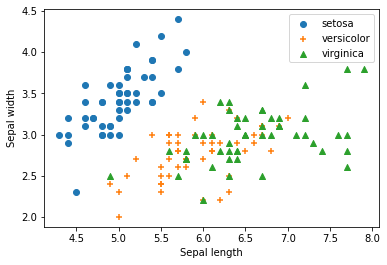

In [28]:
markers = ['o','+','^']

for i in range(3) :
    xs = X2[:, 0][y == i]
    ys = X2[:, 1][y == i]
    plt.scatter(xs, ys, marker=markers[i])

plt.legend(iris.target_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

In [29]:
y2 = y.copy()
y2[y2==2] = 1
y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, stratify=y2, test_size=0.7)

Text(0, 0.5, 'Sepal width')

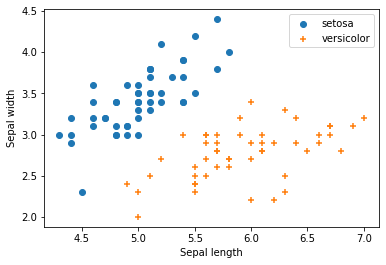

In [32]:
markers = ['o','+']

for i in range(2) :
    xs = X2[:, 0][y == i]
    ys = X2[:, 1][y == i]
    plt.scatter(xs, ys, marker=markers[i])

plt.legend(iris.target_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

##### 머신러닝 모델 생성  : 1. 일반 선형 모델

In [33]:
from sklearn.linear_model import SGDClassifier

In [35]:
clf = SGDClassifier(max_iter=1000)
clf.fit(X_train, y_train)

SGDClassifier()

In [37]:
'''
ax + by + c = 0
y = -a/b*x + (-c/b)
'''

'\nax + by + c = 0\ny = -a/b*x + (-c/b)\n'

In [36]:
a = clf.coef_[0,0]
b = clf.coef_[0,1]
c = clf.intercept_

##### 머신러닝 모델 생성 : 2. SVM

In [38]:
from sklearn.svm import SVC

In [39]:
svm_clf = SVC(kernel='linear', C=float('inf'))

In [40]:
svm_clf.fit(X_train, y_train)

SVC(C=inf, kernel='linear')

###### 그래프 그려보기

C:\Users\zizipong\AppData\Local\Temp/ipykernel_8032/3845057663.py:27: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("setosa", "non-setosa")
C:\Users\zizipong\AppData\Local\Temp/ipykernel_8032/3845057663.py:27: UserWarning: Legend does not support 'e' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("setosa", "non-setosa")
C:\Users\zizipong\AppData\Local\Temp/ipykernel_8032/3845057663.py:27: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("setosa", "non-setosa")
C:\Users\zizipong\AppData\Local\Temp/ipy

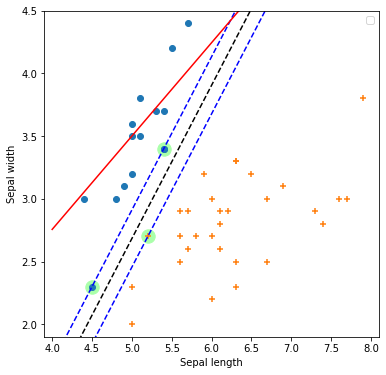

In [47]:
plt.figure(figsize=(6,6))
plt.xlim(3.9, 8.1)
plt.ylim(1.9, 4.5)

XX = np.linspace(4, 8, 30)
w = svm_clf.coef_[0]
v = svm_clf.intercept_[0]

decision_boundary = -w[0]/w[1] * XX - v/w[1]

margin = 1/w[1]
gutter_up = decision_boundary + margin
gutter_down = decision_boundary - margin

svs = svm_clf.support_vectors_
plt.scatter(svs[:,0], svs[:,1], s=180, facecolors='#AAFFAA')
plt.plot(XX, decision_boundary, "k--")
plt.plot(XX, gutter_up, "b--")
plt.plot(XX, gutter_down, "b--")

markers = ['o', '+', '^']
for i in range(3):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, marker=markers[i])
    
plt.legend("setosa", "non-setosa")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.plot(XX, (-a/b * XX + -c/b), "r-")

# SVM 을 이용한 비선형 분류 p112
### kernel 사용 : 원래 데이터를 --> 고차원 속성 데이터로 변환 --> (고차원 공간상에서) 선형 분류

In [48]:
from sklearn.datasets import load_breast_cancer

In [49]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X.shape, y.shape

((569, 30), (569,))

In [50]:
np.random.seed(13)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target)

In [53]:
classifier = SVC(kernel='rbf', C=1000, gamma=0.1, probability=True)

In [54]:
classifier.fit(X_train, y_train)

SVC(C=1000, gamma=0.1, probability=True)

In [55]:
classifier.score(X_test, y_test).round(2)

0.63

##### 선형분류 성능 비교

In [57]:
clf = SGDClassifier(max_iter=1000)
clf.fit(X_train, y_train)
clf.score(X_test, y_test).round(2)

0.73